In [3]:
import praw
import pandas as pd
import time
from nltk.corpus import stopwords

In [16]:
from datetime import datetime
from datetime import timezone
dt_2020 = datetime(2020, 4, 21)
ts_2020 = dt_2020.replace(tzinfo=timezone.utc).timestamp()
print(ts_2020)

dt_2021 = datetime(2021, 4, 21)
ts_2021 = dt_2021.replace(tzinfo=timezone.utc).timestamp()
print(ts_2021)

1587427200.0
1618963200.0


In [21]:
reddit = praw.Reddit(client_id='nfgFdWocI1GFIQ',
                    client_secret='z_rsAXFyjZ3fELcJKucmHsQIB3jgHQ',
                    password='447account',
                    user_agent='447 Example',
                    username='Traditional-Ad-9640')
news = reddit.subreddit('News')


yesterdays_news = news.random()

topics_dict={"title":[],\
                "score":[],\
                "id":[],\
                "url":[],\
                "coms_num":[],\
                "author":[],\
                "upvotes":[],\
                }
x = 0

while x < 1500:
    x+=1
    time.sleep(.5)
    post = news.random()
    if isinstance(post, praw.models.reddit.submission.Submission) and post.created_utc > 1618963200:
        topics_dict["title"].append(post.title)
        topics_dict["score"].append(post.score)
        topics_dict["id"].append(post.id)
        topics_dict["url"].append(post.url)
        topics_dict["coms_num"].append(post.num_comments)
        topics_dict["author"].append(post.author)
        topics_dict["upvotes"].append(post.ups)

US_news_df = pd.DataFrame(data=topics_dict)
US_news_df

KeyboardInterrupt: 

In [ ]:
US_news_df.to_csv("US2021.csv")

In [ ]:
US_news_df_copy = US_news_df.copy()

In [25]:
# df['title']=df['title'].str.replace('[^A-Za-z0-9 ]','',regex=True)
US_news_df_copy['word_count'] = US_news_df_copy['title'].apply(lambda x: len(str(x).split(" ")))
US_news_df_copy

,title,score,id,url,coms_num,author,upvotes,word_count
0,Black man fatally shot by sheriffs deputies se...,160,mw08t1,https://www.reuters.com/world/us/black-man-fat...,155,Time_Traveller_69,160,13
1,Belgian ambassador to South Korea apologises a...,20,mw80lq,https://www.bbc.com/news/world-asia-56848548,4,trenta_nueve,20,11
2,Relics seized from smugglers are returning to ...,55,mw025f,https://apnews.com/article/ny-state-wire-afgha...,4,harrymatics,55,8
3,Russia to Withdraw Troops From Ukraine Border,26209,mw3h9h,https://www.themoscowtimes.com/2021/04/22/russ...,1492,Millie68,26209,7
4,Woman shackled by police while in labor settle...,211,mw652o,https://www.cnn.com/2021/04/21/us/new-york-pre...,29,tangotango112,211,14
...,...,...,...,...,...,...,...,...
1134,Former Bay City Rollers frontman Les McKeown d...,13,mw8r8q,https://www.bbc.com/news/entertainment-arts-56...,1,Morrati_Mauro,13,10
1135,Syrian airdefence missile lands near Israeli n...,79,mw0o1l,https://www.bbc.co.uk/news/world-middle-east-5...,4,mitchanium,79,8
1136,Putin warns West of harsh response if it cross...,785,mvm6au,https://www.reuters.com/world/europe/navalny-s...,304,Time_Traveller_69,785,12
1137,Former Bay City Rollers frontman Les McKeown d...,13,mw8r8q,https://www.bbc.com/news/entertainment-arts-56...,1,Morrati_Mauro,13,10


In [26]:
US_news_df_copy['title']=US_news_df_copy['title'].apply(lambda x: " ".join(x.lower() for x in x.split()))
US_news_df_copy

,title,score,id,url,coms_num,author,upvotes,word_count
0,black man fatally shot by sheriffs deputies se...,160,mw08t1,https://www.reuters.com/world/us/black-man-fat...,155,Time_Traveller_69,160,13
1,belgian ambassador to south korea apologises a...,20,mw80lq,https://www.bbc.com/news/world-asia-56848548,4,trenta_nueve,20,11
2,relics seized from smugglers are returning to ...,55,mw025f,https://apnews.com/article/ny-state-wire-afgha...,4,harrymatics,55,8
3,russia to withdraw troops from ukraine border,26209,mw3h9h,https://www.themoscowtimes.com/2021/04/22/russ...,1492,Millie68,26209,7
4,woman shackled by police while in labor settle...,211,mw652o,https://www.cnn.com/2021/04/21/us/new-york-pre...,29,tangotango112,211,14
...,...,...,...,...,...,...,...,...
1134,former bay city rollers frontman les mckeown d...,13,mw8r8q,https://www.bbc.com/news/entertainment-arts-56...,1,Morrati_Mauro,13,10
1135,syrian airdefence missile lands near israeli n...,79,mw0o1l,https://www.bbc.co.uk/news/world-middle-east-5...,4,mitchanium,79,8
1136,putin warns west of harsh response if it cross...,785,mvm6au,https://www.reuters.com/world/europe/navalny-s...,304,Time_Traveller_69,785,12
1137,former bay city rollers frontman les mckeown d...,13,mw8r8q,https://www.bbc.com/news/entertainment-arts-56...,1,Morrati_Mauro,13,10


In [27]:
stop = stopwords.words('english')
US_news_df_copy['title'] = US_news_df_copy['title'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
US_news_df_copy

,title,score,id,url,coms_num,author,upvotes,word_count
0,black man fatally shot sheriffs deputies servi...,160,mw08t1,https://www.reuters.com/world/us/black-man-fat...,155,Time_Traveller_69,160,13
1,belgian ambassador south korea apologises wife...,20,mw80lq,https://www.bbc.com/news/world-asia-56848548,4,trenta_nueve,20,11
2,relics seized smugglers returning afghanistan,55,mw025f,https://apnews.com/article/ny-state-wire-afgha...,4,harrymatics,55,8
3,russia withdraw troops ukraine border,26209,mw3h9h,https://www.themoscowtimes.com/2021/04/22/russ...,1492,Millie68,26209,7
4,woman shackled police labor settles new york c...,211,mw652o,https://www.cnn.com/2021/04/21/us/new-york-pre...,29,tangotango112,211,14
...,...,...,...,...,...,...,...,...
1134,former bay city rollers frontman les mckeown d...,13,mw8r8q,https://www.bbc.com/news/entertainment-arts-56...,1,Morrati_Mauro,13,10
1135,syrian airdefence missile lands near israeli n...,79,mw0o1l,https://www.bbc.co.uk/news/world-middle-east-5...,4,mitchanium,79,8
1136,putin warns west harsh response crosses russia...,785,mvm6au,https://www.reuters.com/world/europe/navalny-s...,304,Time_Traveller_69,785,12
1137,former bay city rollers frontman les mckeown d...,13,mw8r8q,https://www.bbc.com/news/entertainment-arts-56...,1,Morrati_Mauro,13,10


In [29]:
sorted = US_news_df_copy.sort_values(by=['upvotes'], ascending=False)
new_df = sorted.drop_duplicates(subset=['title'])
US_top_30 = new_df.head(30)
US_top_30

,title,score,id,url,coms_num,author,upvotes,word_count
1049,virginia city fires police officer kyle ritten...,64895,mvkul2,https://apnews.com/article/police-philanthropy...,7411,Spin_Me,64895,9
1118,russia withdraw troops ukraine border,35145,mw3h9h,https://www.themoscowtimes.com/2021/04/22/russ...,1825,Millie68,35145,7
934,woman finds tracking device car louisiana stat...,34051,mvsb7s,https://www.wbrz.com/news/woman-finds-tracking...,2025,DICK-FUCK-PUSSY-SUCK,34051,12
503,man hit 4000 bill yearlong jail stay charges l...,29192,mvq3wk,https://www.wkyt.com/2021/04/21/man-hit-with-4...,1561,crosleyxj,29192,15
1127,derek chauvin held solitary confinement 23 hou...,27083,mvkejd,https://www.nytimes.com/2021/04/21/us/derek-ch...,4383,3dprinteddildo,27083,13
1018,scientific paper claiming smokers less likely ...,15661,mvyypl,https://www.theguardian.com/science/2021/apr/2...,636,Faruyazy,15661,14
906,spain give pets rights humans breakthrough hom...,14051,mvrd7y,https://inews.co.uk/news/spain-pets-human-righ...,496,TVaddictpanda,14051,15
566,neonazi leader arrested arizona aggravated ass...,10666,mvq2l4,https://www.reuters.com/world/us/neo-nazi-lead...,509,DissentingJay,10666,8
1016,suspending male student wearing nail polish te...,8176,mvpoud,https://www.nbcnews.com/feature/nbc-out/suspen...,458,sh0tgunben,8176,12
1074,italian hospital employee accused skipping wor...,5398,mvp8ze,https://www.bbc.com/news/world-europe-56822571,413,Piranha_ChuckNorris,5398,10


In [30]:
corpus = ' '.join(US_top_30['title'])
corp = open("news_words.txt","w")
corp.writelines(corpus)
corp.close()

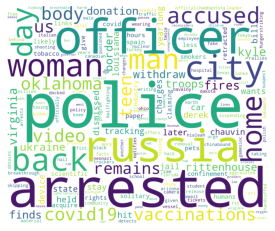

In [3]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

file_content=open("news_words.txt").read()

wordcloud = WordCloud(stopwords = STOPWORDS,
                            background_color = 'white',
                            width = 1200,
                            height = 1000
                            ).generate(file_content)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
reddit = praw.Reddit(client_id='pUBdCmRMoXbboA',
                        client_secret='dbY5VCYAyuno7ch7S0TeAmUPdBtMYA',
                        user_agent='INST447',
                        username='Fit_Veterinarian_651')
 
world_news = reddit.subreddit('worldnews')


elements_dict = {"title":[],\
                "score":[],\
                "id":[],\
                "url":[],\
                "coms_num":[],\
                "author":[],\
                "upvotes":[],\
               }

x = 0

while x < 1500:
    x+=1
    time.sleep(.5)
    post = world_news.random()
    if isinstance(post, praw.models.reddit.submission.Submission) and post.created_utc > 1618963200:
        elements_dict["title"].append(post.title)
        elements_dict["score"].append(post.score)
        elements_dict["id"].append(post.id)
        elements_dict["url"].append(post.url)
        elements_dict["coms_num"].append(post.url)
        elements_dict["author"].append(post.author)
        elements_dict["upvotes"].append(post.ups)
        
WN_df = pd.DataFrame(data=elements_dict)
WN_df

In [ ]:
WN_df.to_csv("World2021.csv")

In [1]:
WN_df_copy = WN_df.copy()

NameError: name 'WN_df' is not defined

In [7]:
WN_df_copy['word_count'] = WN_df_copy['title'].apply(lambda x: len(str(x).split(' ')))
WN_df_copy

,title,score,id,url,coms_num,author,upvotes,word_count
0,Supreme Court affirms American Indigenous man'...,309,mxgkfl,https://www.ctvnews.ca/canada/supreme-court-af...,https://www.ctvnews.ca/canada/supreme-court-af...,BurstYourBubbles,309,14
1,‘Democracy is not Coca-Cola’: Beijing says US ...,0,mxm0je,https://www.rt.com/news/521997-coca-cola-china...,https://www.rt.com/news/521997-coca-cola-china...,TigerSharkFist,0,19
2,Nearly half of doses administered so far have ...,54,mxdx31,https://www.washingtonpost.com/world/interacti...,https://www.washingtonpost.com/world/interacti...,JoseThomas_303,54,21
3,"Turkey launches ground, air operation in north...",39,mxihab,https://www.hurriyetdailynews.com/turkey-launc...,https://www.hurriyetdailynews.com/turkey-launc...,zandarzigan,39,8
4,Malaysia: Artist arrested for 'insulting queen...,22,mxn8ll,https://www.dw.com/en/malaysia-artist-arrested...,https://www.dw.com/en/malaysia-artist-arrested...,SaulKD,22,9
...,...,...,...,...,...,...,...,...
1495,A jury in Britain cleared six climate activist...,389,mwyf7h,https://www.france24.com/en/live-news/20210423...,https://www.france24.com/en/live-news/20210423...,DoremusJessup,389,46
1496,Ryanair claims it had to fly empty jet from Pa...,9,mxl1hm,https://www.irishtimes.com/business/transport-...,https://www.irishtimes.com/business/transport-...,Sad-AdTrump2024,9,14
1497,Renewables could displace fossil fuels to powe...,18,mxk6sp,https://www.cnbc.com/2021/04/23/climate-renewa...,https://www.cnbc.com/2021/04/23/climate-renewa...,thorium43,18,13
1498,Covid-19: India is going through very terrible...,27,mxg3qv,https://timesofindia.indiatimes.com/india/covi...,https://timesofindia.indiatimes.com/india/covi...,Adalyn_Sara,27,12


In [8]:
WN_df_copy['title'] = WN_df_copy['title'].apply(lambda x:' '.join(x.lower() for x in x.split()))
WN_df_copy

,title,score,id,url,coms_num,author,upvotes,word_count
0,supreme court affirms american indigenous man'...,309,mxgkfl,https://www.ctvnews.ca/canada/supreme-court-af...,https://www.ctvnews.ca/canada/supreme-court-af...,BurstYourBubbles,309,14
1,‘democracy is not coca-cola’: beijing says us ...,0,mxm0je,https://www.rt.com/news/521997-coca-cola-china...,https://www.rt.com/news/521997-coca-cola-china...,TigerSharkFist,0,19
2,nearly half of doses administered so far have ...,54,mxdx31,https://www.washingtonpost.com/world/interacti...,https://www.washingtonpost.com/world/interacti...,JoseThomas_303,54,21
3,"turkey launches ground, air operation in north...",39,mxihab,https://www.hurriyetdailynews.com/turkey-launc...,https://www.hurriyetdailynews.com/turkey-launc...,zandarzigan,39,8
4,malaysia: artist arrested for 'insulting queen...,22,mxn8ll,https://www.dw.com/en/malaysia-artist-arrested...,https://www.dw.com/en/malaysia-artist-arrested...,SaulKD,22,9
...,...,...,...,...,...,...,...,...
1495,a jury in britain cleared six climate activist...,389,mwyf7h,https://www.france24.com/en/live-news/20210423...,https://www.france24.com/en/live-news/20210423...,DoremusJessup,389,46
1496,ryanair claims it had to fly empty jet from pa...,9,mxl1hm,https://www.irishtimes.com/business/transport-...,https://www.irishtimes.com/business/transport-...,Sad-AdTrump2024,9,14
1497,renewables could displace fossil fuels to powe...,18,mxk6sp,https://www.cnbc.com/2021/04/23/climate-renewa...,https://www.cnbc.com/2021/04/23/climate-renewa...,thorium43,18,13
1498,covid-19: india is going through very terrible...,27,mxg3qv,https://timesofindia.indiatimes.com/india/covi...,https://timesofindia.indiatimes.com/india/covi...,Adalyn_Sara,27,12


In [9]:
stop = stopwords.words('english')
WN_df_copy['title'] = WN_df_copy['title'].apply(lambda x: ' '.join(x for x in x.split() if x not in stop))
WN_df_copy

,title,score,id,url,coms_num,author,upvotes,word_count
0,supreme court affirms american indigenous man'...,309,mxgkfl,https://www.ctvnews.ca/canada/supreme-court-af...,https://www.ctvnews.ca/canada/supreme-court-af...,BurstYourBubbles,309,14
1,‘democracy coca-cola’: beijing says us shouldn...,0,mxm0je,https://www.rt.com/news/521997-coca-cola-china...,https://www.rt.com/news/521997-coca-cola-china...,TigerSharkFist,0,19
2,nearly half doses administered far gone high- ...,54,mxdx31,https://www.washingtonpost.com/world/interacti...,https://www.washingtonpost.com/world/interacti...,JoseThomas_303,54,21
3,"turkey launches ground, air operation northern...",39,mxihab,https://www.hurriyetdailynews.com/turkey-launc...,https://www.hurriyetdailynews.com/turkey-launc...,zandarzigan,39,8
4,malaysia: artist arrested 'insulting queen' sp...,22,mxn8ll,https://www.dw.com/en/malaysia-artist-arrested...,https://www.dw.com/en/malaysia-artist-arrested...,SaulKD,22,9
...,...,...,...,...,...,...,...,...
1495,jury britain cleared six climate activists ext...,389,mwyf7h,https://www.france24.com/en/live-news/20210423...,https://www.france24.com/en/live-news/20210423...,DoremusJessup,389,46
1496,ryanair claims fly empty jet paris quarantine ...,9,mxl1hm,https://www.irishtimes.com/business/transport-...,https://www.irishtimes.com/business/transport-...,Sad-AdTrump2024,9,14
1497,renewables could displace fossil fuels power w...,18,mxk6sp,https://www.cnbc.com/2021/04/23/climate-renewa...,https://www.cnbc.com/2021/04/23/climate-renewa...,thorium43,18,13
1498,"covid-19: india going terrible situation, says...",27,mxg3qv,https://timesofindia.indiatimes.com/india/covi...,https://timesofindia.indiatimes.com/india/covi...,Adalyn_Sara,27,12


In [10]:
sorting_vote = test_df.sort_values(by=['upvotes'], ascending=False)
sorted_WN_df = sorting_vote.drop_duplicates(subset=['title'])
WN_top_30 = test_df2.head(30)
WN_top_30

,title,score,id,url,coms_num,author,upvotes,word_count
439,uk parliament unanimously declares chinese gov...,137453,mw8d2j,https://ipac.global/uk-parliament-unanimously-...,https://ipac.global/uk-parliament-unanimously-...,Oddsock1701,137453,16
916,baltic states expel russian diplomats solidari...,58307,mwt5kw,https://www.lrt.lt/en/news-in-english/19/13941...,https://www.lrt.lt/en/news-in-english/19/13941...,Imgoga,58307,9
968,people across india scrambled life-saving oxyg...,37050,mx3a6i,https://www.reuters.com/world/india/fire-covid...,https://www.reuters.com/world/india/fire-covid...,ahm713,37050,30
122,indonesia submarine kri nanggala 402 declared ...,32647,mxgvhy,https://www.foxnews.com/world/indonesia-submar...,https://www.foxnews.com/world/indonesia-submar...,Acrobaticmonkhie,32647,14
751,navalny ends hunger strike seen civilian doctors,29535,mwvq84,https://www.aljazeera.com/news/2021/4/23/naval...,https://www.aljazeera.com/news/2021/4/23/naval...,None,29535,10
1183,"bad software sent postal workers jail, one wan...",26943,mx7ust,https://www.theverge.com/2021/4/23/22399721/uk...,https://www.theverge.com/2021/4/23/22399721/uk...,Mexicanuck,26943,17
197,"thief steals bag 1,700 doses vaccine haryana. ...",19194,mw8ago,https://www.ndtv.com/india-news/coronavirus-so...,https://www.ndtv.com/india-news/coronavirus-so...,beebaabooboo,19194,23
1453,biden officially recognizes massacre armenians...,17868,mxo8eu,https://www.cnn.com/2021/04/24/politics/armeni...,https://www.cnn.com/2021/04/24/politics/armeni...,Rpdaca,17868,14
628,dozens palestinians injured police clashes jew...,15285,mwz0xm,https://www.cnn.com/2021/04/23/middleeast/jeru...,https://www.cnn.com/2021/04/23/middleeast/jeru...,StabFox64,15285,17
790,japan declares state emergency tokyo osaka cas...,12291,mwsuye,https://www.nytimes.com/2021/04/23/world/japan...,https://www.nytimes.com/2021/04/23/world/japan...,PoliticiansAlwaysLie,12291,15


In [11]:
corpus = ' '.join(WN_top_30['title'])
corp = open("worldNews_words.txt", "w")
corp.writelines(corpus)
corp.close()

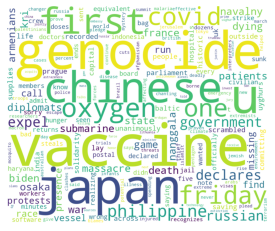

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

WNtxt_content = open("worldNews_words.txt").read()

wordcloud = WordCloud(stopwords = STOPWORDS, 
                     background_color = 'white',
                     width = 1200,
                     height = 1000).generate(WNtxt_content)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [13]:
from collections import Counter
def word_count(fname):
        with open(fname) as f:
                return Counter(f.read().split())

print("Number of words in the file :",word_count("worldNews_words.txt"))

Number of words in the file : Counter({'genocide': 4, 'vaccine': 4, 'japan': 4, 'chinese': 3, 'first': 3, 'oxygen': 3, 'one': 3, 'covid-19': 3, 'declares': 2, 'government': 2, 'russian': 2, 'diplomats': 2, 'friday': 2, 'patients': 2, 'dying': 2, 'kri': 2, 'navalny': 2, 'could': 2, 'biden': 2, 'armenians': 2, 'osaka': 2, 'us': 2, 'france': 2, 'protests': 2, 'race': 2, 'missing': 2, 'find': 2, 'presence': 2, 'philippine': 2, 'uk': 1, 'parliament': 1, 'unanimously': 1, 'committing': 1, 'uyghurs': 1, 'historic': 1, 'baltic': 1, 'states': 1, 'expel': 1, 'solidarity': 1, 'prague': 1, 'people': 1, 'across': 1, 'india': 1, 'scrambled': 1, 'life-saving': 1, 'supplies': 1, 'lay': 1, 'outside': 1, 'hospitals': 1, 'capital': 1, 'recorded': 1, 'equivalent': 1, 'death': 1, 'every': 1, 'five': 1, 'minutes': 1, 'indonesia': 1, 'submarine': 1, 'nanggala': 1, '402': 1, 'declared': 1, 'sunk': 1, '53': 1, 'crew': 1, 'members': 1, 'board.': 1, 'ends': 1, 'hunger': 1, 'strike': 1, 'seen': 1, 'civilian': 1, 

In [14]:
print("Number of words in the file :",word_count("news_words.txt"))

Number of words in the file : Counter({'police': 5, 'arrested': 4, 'city': 2, 'officer': 2, 'russia': 2, 'woman': 2, 'back': 2, 'man': 2, 'home': 2, 'accused': 2, 'body': 2, 'video': 2, 'teen': 2, 'covid19': 2, 'vaccinations': 2, 'us': 2, 'oklahoma': 2, 'remains': 2, 'virginia': 1, 'fires': 1, 'kyle': 1, 'rittenhouse': 1, 'donation': 1, 'withdraw': 1, 'troops': 1, 'ukraine': 1, 'border': 1, 'finds': 1, 'tracking': 1, 'device': 1, 'car': 1, 'louisiana': 1, 'state': 1, 'wants': 1, 'hit': 1, '4000': 1, 'bill': 1, 'yearlong': 1, 'jail': 1, 'stay': 1, 'charges': 1, 'later': 1, 'dismissed': 1, 'derek': 1, 'chauvin': 1, 'held': 1, 'solitary': 1, 'confinement': 1, '23': 1, 'hours': 1, 'day': 1, 'scientific': 1, 'paper': 1, 'claiming': 1, 'smokers': 1, 'less': 1, 'likely': 1, 'acquire': 1, 'covid': 1, 'retracted': 1, 'tobacco': 1, 'industry': 1, 'links': 1, 'spain': 1, 'give': 1, 'pets': 1, 'rights': 1, 'humans': 1, 'breakthrough': 1, 'bullfighting': 1, 'neonazi': 1, 'leader': 1, 'arizona': 1, 

In [16]:
df.shape()

NameError: name 'df' is not defined

In [15]:
test_df.shape

(1500, 8)